###         **NLP Project for Disaster Tweet Classification**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
nlp_data=pd.read_csv('twitter_disaster.csv')

In [5]:
nlp_data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [6]:
nlp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
nlp_data.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
nlp_data['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [9]:
nlp_data['location'].unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [10]:
nlp_data.describe().round(2)

,id,target
count,7613.00,7613.00
mean,5441.93,0.43
std,3137.12,0.50
min,1.00,0.00
25%,2734.00,0.00
50%,5408.00,0.00
75%,8146.00,1.00
max,10873.00,1.00


### Replacing the Null Values to object columns

In [11]:
nlp_data['location'].fillna('Unknown', inplace=True)
nlp_data['keyword'].fillna('NotAvailable', inplace=True)

### Class Distribution

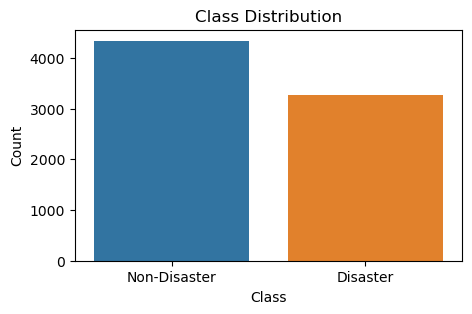

In [12]:
plt.figure(figsize=(5,3))
sns.countplot(x='target', data=nlp_data)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0,1],['Non-Disaster','Disaster'])
plt.show()

### Filter disaster tweet

In [13]:
disaster_tweets=nlp_data[nlp_data['target']==1]['text']

In [14]:
disaster_tweets

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 3271, dtype: object

### Tokenize and count word frequencies

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pooji\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
from collections import Counter
from nltk.tokenize import word_tokenize

disaster_tweets = nlp_data[nlp_data['target']==1] ['keyword']
word_freq=Counter()

for tweet in disaster_tweets:
    if pd.notnull(tweet):
        tokens = word_tokenize(tweet.lower())
        word_freq.update(tokens)

print(word_freq)


Counter({'%': 708, 'suicide': 94, '20fires': 72, 'buildings': 52, '20storm': 50, '20disaster': 49, 'mass': 47, 'emergency': 46, 'nuclear': 45, '20fire': 43, 'notavailable': 42, 'forest': 42, 'derailment': 39, 'outbreak': 39, 'wreckage': 39, 'debris': 37, 'oil': 37, '20spill': 37, 'typhoon': 37, 'fire': 33, 'evacuated': 32, 'rescuers': 32, '20bomb': 32, '20bombing': 32, 'burning': 31, 'razed': 31, 'airplane': 30, '20accident': 30, 'earthquake': 30, '20bomber': 30, 'bridge': 29, '20collapse': 29, 'collision': 29, 'wildfire': 29, '20on': 28, 'casualties': 28, 'drought': 28, 'evacuation': 28, '20murder': 28, 'sandstorm': 28, 'bombing': 27, 'devastation': 27, 'hostages': 27, 'sinkhole': 27, 'wild': 27, 'deaths': 26, 'derailed': 26, 'displaced': 26, 'famine': 26, 'fatal': 26, 'fatalities': 26, 'floods': 26, 'thunderstorm': 26, 'violent': 26, 'wounded': 26, 'attack': 25, 'evacuate': 25, 'flooding': 25, 'heat': 25, '20wave': 25, 'massacre': 25, 'accident': 24, '20burning': 24, 'dust': 24, 'hai

### Frequency of phrases 

In [17]:
from nltk.util import ngrams

for tweet in disaster_tweets.dropna():
    token = word_tokenize(tweet.lower())
    bi_grams = ngrams(token, 2)
    word_freq.update(bi_grams)

num_phrases = 20
top_phrases = word_freq.most_common(num_phrases)

for phrase, frequency in top_phrases:
    print(' '.join(phrase), ':', frequency)

% : 708
s u i c i d e : 94
suicide % : 94
2 0 f i r e s : 72
% 20fires : 72
b u i l d i n g s : 52
buildings % : 52
2 0 s t o r m : 50
% 20storm : 50
2 0 d i s a s t e r : 49
% 20disaster : 49
m a s s : 47
mass % : 47
e m e r g e n c y : 46
n u c l e a r : 45
nuclear % : 45
2 0 f i r e : 43
% 20fire : 43
n o t a v a i l a b l e : 42
f o r e s t : 42
